## DATA AND PRE - PROCESSING

In [1]:
import pandas as pd 

data = pd.read_csv('/Volumes/DATA/ML/ETA_checkin/ETA_checkin/data/reservation.csv')

In [2]:
specific_location_id = '7e2a8a81-1462-11eb-89a4-42010a010003'
df = data[data['location_id'] == specific_location_id]
df

,id,location_id,table_pref,device_id,party_size,kids_size,high_chair_size,seat_together,channel_name,section_id,...,reservation_time,cancellation_time,estimate_seconds,actual_dinein_time,actual_dineout_time,notify_party,reservation_status,user_id,created_time,modified_time
10,0001c3b4-32df-4f9b-b2c3-f2e5135cf5fb,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3,1,0,1.0,ONLINE,NaN,...,2022-06-02 23:10:51,NaN,0,NaN,NaN,1,I,3aefac33-d5e8-4b33-bbdf-08fbd2e1ef61,2022-06-02 23:10:51,2022-06-02 23:10:51
13,00023598-27ac-4203-a247-0e9d4f3cb1c0,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3,0,0,1.0,ONLINE,NaN,...,2021-10-30 22:43:51,NaN,0,2021-10-30 22:43:51,2021-10-30 23:45:30,1,C,f61c17b6-5839-4860-8032-77d20c63e945,2021-10-30 22:43:51,2021-10-30 23:45:30
14,0002a769-4a13-401d-905a-02541ba49405,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3,0,0,1.0,ONLINE,NaN,...,2021-11-13 01:46:54,NaN,0,2021-11-13 01:46:54,2021-11-13 16:38:28,1,C,6f0199f7-e0ac-4482-970a-7227e3991feb,2021-11-13 01:46:54,2021-11-13 16:38:28
15,0002ae19-0f50-4d71-adf9-b2c833f3844e,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,1,0,0,1.0,ONLINE,NaN,...,2022-05-23 01:30:58,NaN,0,2022-05-23 01:30:58,2022-05-24 17:26:04,0,C,NaN,2022-05-23 01:30:58,2022-05-24 17:26:04
16,0002df69-cfe5-41ef-a10b-c588e4411cb9,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,5,1,0,1.0,ONLINE,4e014b99-1468-11eb-89a4-42010a010007,...,2023-09-03 17:16:20,NaN,0,2023-09-03 17:37:35,NaN,1,L,NaN,2023-09-03 17:16:20,2023-09-03 17:42:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326578,fffbd588-420a-4612-b812-d8c17eaa2d23,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3,1,0,1.0,ONLINE,NaN,...,2021-03-26 16:20:30,NaN,0,2021-03-26 16:20:30,2021-03-26 21:48:34,1,C,d4c19dfc-f98b-48b5-a562-7b686481624f,2021-03-26 16:20:30,2021-03-26 21:48:34
326582,fffd0a86-f36d-4dc2-bc5f-fda99a214bb6,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,1,0,0,1.0,ONLINE,NaN,...,2021-09-24 21:33:37,NaN,0,2021-09-24 21:33:37,2021-09-24 21:34:22,1,C,02b4b292-2731-416c-ba5c-37f0b7bd83db,2021-09-24 21:33:37,2021-09-24 21:34:22
326589,fffea8ff-462b-4ddf-b13d-cefa971152e9,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,4,0,0,1.0,ONLINE,NaN,...,2022-07-04 16:56:06,NaN,0,2022-07-04 16:56:07,2022-07-04 18:52:38,1,C,a379a79d-5fc3-4b2b-bb4e-d0c47bb00075,2022-07-04 16:56:06,2022-07-04 18:52:38
326590,fffee5b3-76af-4ee0-b7c3-aefe73049132,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3,0,0,1.0,ONLINE,NaN,...,2022-03-13 17:24:26,NaN,0,NaN,NaN,1,I,cf975d9c-ff78-46f8-a1c1-d851460e0f02,2022-03-13 17:24:26,2022-03-13 17:24:26


In [3]:
import pandas as pd

# Assuming your data is already loaded into a DataFrame named df

# Convert reservation_time to datetime format with format inference
df['reservation_time'] = pd.to_datetime(df['reservation_time'], utc=True)

# Extract the hour from reservation_time
df['hour'] = df['reservation_time'].dt.hour

# Define bins (hourly intervals from 0 to 23)
bins = list(range(0, 25))  # Bins for each hour of the day (24 hours)
labels = [f'{i:02d}:00-{i+1:02d}:00' for i in range(0, 24)]  # Labels for each hour interval

# Categorize the hours into bins
df['time_bin'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False, include_lowest=True)

# Count the number of reservations in each bin
reservation_counts = df['time_bin'].value_counts().sort_index()

print(reservation_counts)


time_bin
00:00-01:00    17992
01:00-02:00    10985
02:00-03:00     2250
03:00-04:00       49
04:00-05:00       11
05:00-06:00        5
06:00-07:00        7
07:00-08:00        1
08:00-09:00        2
09:00-10:00        2
10:00-11:00        2
11:00-12:00        2
12:00-13:00       11
13:00-14:00        4
14:00-15:00       12
15:00-16:00     2443
16:00-17:00     8397
17:00-18:00    11933
18:00-19:00    10319
19:00-20:00     5169
20:00-21:00     1126
21:00-22:00     2138
22:00-23:00     7521
23:00-24:00    15059
Name: count, dtype: int64


/var/folders/6w/9qtyzjdd3q3g7fk06nhhv8v00000gn/T/ipykernel_1160/1598608996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_time'] = pd.to_datetime(df['reservation_time'], utc=True)
/var/folders/6w/9qtyzjdd3q3g7fk06nhhv8v00000gn/T/ipykernel_1160/1598608996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['reservation_time'].dt.hour
/var/folders/6w/9qtyzjdd3q3g7fk06nhhv8v00000gn/T/ipykernel_1160/1598608996.py:16: SettingWithCopyWarning: 
A value is trying to be set on a 

In [4]:
import pandas as pd
import pytz

df = pd.DataFrame(df)

df['reservation_time'] = pd.to_datetime(df['reservation_time'], utc=True)

df['weekday'] = df['reservation_time'].dt.day_name()

print(df)



                                          id  \
10      0001c3b4-32df-4f9b-b2c3-f2e5135cf5fb   
13      00023598-27ac-4203-a247-0e9d4f3cb1c0   
14      0002a769-4a13-401d-905a-02541ba49405   
15      0002ae19-0f50-4d71-adf9-b2c833f3844e   
16      0002df69-cfe5-41ef-a10b-c588e4411cb9   
...                                      ...   
326578  fffbd588-420a-4612-b812-d8c17eaa2d23   
326582  fffd0a86-f36d-4dc2-bc5f-fda99a214bb6   
326589  fffea8ff-462b-4ddf-b13d-cefa971152e9   
326590  fffee5b3-76af-4ee0-b7c3-aefe73049132   
326591  fffeedd0-893c-4dbd-b6cd-05c030f0dbec   

                                 location_id  table_pref  device_id  \
10      7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN   
13      7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN   
14      7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN   
15      7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN   
16      7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN 

In [5]:
res_table = pd.read_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\data\\reservation_table.csv')

In [6]:
specific_location_id = '7e2a8a81-1462-11eb-89a4-42010a010003'
res_table = res_table[res_table['location_id'] == specific_location_id]

In [7]:
merge = pd.merge(df, res_table, left_on='id', right_on='reservation_id',how='right')

In [8]:
import pandas as pd

merge['assignment_time'] = pd.to_datetime(merge['assignment_time'], errors='coerce', utc=True)
merge['reservation_time'] = pd.to_datetime(merge['reservation_time'], errors='coerce', utc=True)

merge['ETA'] = (merge['assignment_time'] - merge['reservation_time']).dt.total_seconds() / 60

merge['assignment_time'] = merge['assignment_time'].dt.tz_localize(None)
merge['reservation_time'] = merge['reservation_time'].dt.tz_localize(None)


In [9]:
table = pd.read_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\data\\table.csv')

In [10]:
merge_2 = pd.merge(res_table,table,left_on='table_id',right_on='id',how='left')

In [11]:
merge_4 = pd.merge(merge,table,left_on='table_id',right_on='id',how='left')

In [12]:
merge_4 = merge_4.rename(columns={
    'id_x':'reservation_id',
    'location_id_x':'locaion_id',
})

In [13]:
merge_4.to_csv('./final_merge.csv')

In [14]:
import pandas as pd

# Load the DataFrame from the CSV file
df = pd.read_csv('./final_merge.csv')

# Function to convert datetime strings to UTC datetime objects
def convert_to_utc(dt):
    try:
        return pd.to_datetime(dt, utc=True)
    except Exception as e:
        print(f"Error while converting datetime to UTC: {e}")
        return pd.NaT  # Return NaT for any errors during conversion
  
# Apply the conversion function to the relevant columns
df['reservation_time'] = df['reservation_time'].apply(convert_to_utc)
df['assignment_time'] = df['assignment_time'].apply(convert_to_utc)

queue_sizes = []

for i in range(len(df)):
    current_reservation_time = df.loc[i, 'reservation_time']
    current_dinein_time = df.loc[i, 'assignment_time']
    
    # Filter relevant rows based on reservation_time and assignment_time
    relevant_rows = df[(df['reservation_time'] <= current_reservation_time) & 
                       (df['assignment_time'] > current_reservation_time)]  # Changed comparison to strict greater than
    
    queue_size = len(relevant_rows)  # No need to subtract 1, as we are excluding the current reservation itself
    queue_sizes.append(queue_size)

# Add the queue_sizes list as a new column in the DataFrame
df['queue_size'] = queue_sizes

# Save the updated DataFrame back to CSV
df.to_csv('./final_merge.csv', index=False)

print("Queue sizes have been calculated and added to the CSV file.")


C:\Users\Admin\AppData\Local\Temp\ipykernel_8716\1720291065.py:4: DtypeWarning: Columns (11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./final_merge.csv')


Queue sizes have been calculated and added to the CSV file.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Convert to DataFrame
df = pd.DataFrame(df)

# Convert to datetimea
df['reservation_time'] = pd.to_datetime(df['reservation_time'], format='%m/%d/%Y %H:%M')

# Extract day, month, hour, and weekday
df['day'] = df['reservation_time'].dt.day
df['month'] = df['reservation_time'].dt.month
#df['hour'] = df['reservation_time'].dt.hour
#df['weekday'] = df['reservation_time'].dt.dayofweek  # Monday=0, Sunday=6

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

# Display the dataframe
print(df.head())


   Unnamed: 0                        reservation_id  \
0           0  62322b8e-b75b-4ad3-9830-ad1c0f9b18ab   
1           1  2ae2b5d3-8967-40c0-b9fd-7689be4c951a   
2           2  387a711e-6e90-4b3e-a6a3-cf60b220a393   
3           3  096f4fda-35ea-4db9-b0f4-6209e1ee256b   
4           4  6891fa3a-589c-4156-8f35-5bd0ac24a22c   

                             locaion_id  table_pref  device_id  party_size  \
0  7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN         1.0   
1  7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN         1.0   
2  7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN         4.0   
3  7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN         2.0   
4  7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN         1.0   

   kids_size  high_chair_size  seat_together channel_name  ...  \
0        0.0              0.0            1.0       ONLINE  ...   
1        0.0              0.0            1.0       ONLINE  ...   
2 

In [16]:
statuses_to_include = ["I", "A", "S", "C"]

# Filter the DataFrame
filtered_df = df[df['reservation_status'].isin(statuses_to_include)]


In [17]:
blanks = ['(Blanks)']
filtered_df = filtered_df[~filtered_df['ETA'].isin(blanks)]

In [18]:
import pandas as pd

filtered_df['reservation_time'] = pd.to_datetime(filtered_df['reservation_time'])

df_sorted = filtered_df.sort_values(by='reservation_time')

df_sorted.drop(columns='Unnamed: 0',inplace=True)

df_sorted.to_csv("./final_merge.csv")

In [19]:
df_sorted['high_chair_size'] = df_sorted['high_chair_size'].apply(lambda x: 1 if x > 0 else 0)

In [20]:
df_sorted.to_csv("./final_merge.csv")

In [21]:
df_sorted = df_sorted[['reservation_id','locaion_id','party_size','high_chair_size','reservation_time','hour','weekday','ETA','queue_size','day','month','season']]

In [22]:
df_sorted.to_csv('./model_input.csv')

In [23]:
df_sorted = df_sorted.rename(columns={'location_i':'location_id'})

In [24]:
import numpy as np
import pandas as pd

# Ensure 'ETA' column exists
if 'ETA' in df_sorted.columns:
    # Set negative ETAs to 0
    df_sorted['ETA'] = df_sorted['ETA'].apply(lambda x: max(x, 0))
    
    # Identify outliers using a z-score approach
    eta_mean = df_sorted['ETA'].mean()
    eta_std = df_sorted['ETA'].std()
    df_sorted['z_score'] = (df_sorted['ETA'] - eta_mean) / eta_std
    
    # Identify outliers where z-score > 3
    outliers = df_sorted[df_sorted['z_score'] > 3]
    
    # Adjust outliers to a higher boundary
    if not outliers.empty:
        outliers['ETA'] = eta_mean + 3 * eta_std  # Adjust outliers to a higher boundary
    
    # Print outliers (if you want to see which ones were adjusted)
    print("Outliers adjusted to higher boundary:")
    print(outliers[['ETA', 'queue_size']])  # Adjust column names as per your actual DataFrame
    
    # Drop z_score column and adjust negative ETAs again
    df_sorted.drop(columns=['z_score'], inplace=True)
    df_sorted['ETA'] = df_sorted['ETA'].apply(lambda x: max(x, 0))
    
    # Print cleaned dataframe
    print("Data after handling outliers and negative ETAs:")
    print(df_sorted[['ETA', 'queue_size']])  # Adjust column names as per your actual DataFrame
    
    # Optionally, save the cleaned dataframe to a new CSV file
    cleaned_file_path = './model_input.csv'  # Update with desired path
    df_sorted.to_csv(cleaned_file_path, index=False)
else:
    print("Column 'ETA' not found in the dataset")


C:\Users\Admin\AppData\Local\Temp\ipykernel_8716\2340179657.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['ETA'] = eta_mean + 3 * eta_std  # Adjust outliers to a higher boundary


Outliers adjusted to higher boundary:
             ETA  queue_size
56891  31.089749           4
57167  31.089749           2
74685  31.089749           2
5461   31.089749           1
64491  31.089749           1
...          ...         ...
38020  31.089749           3
17578  31.089749           1
78790  31.089749           1
22780  31.089749           1
64725  31.089749           1

[593 rows x 2 columns]
Data after handling outliers and negative ETAs:
             ETA  queue_size
46228  14.783333           1
48515  14.366667           2
79372   2.466667           3
73802   1.383333           4
5089    0.883333           1
...          ...         ...
25698   4.033333           3
5194    1.616667           4
64725  52.016667           1
70648  17.133333           1
52323   9.883333           2

[77345 rows x 2 columns]


## MODEL TRAINING

Model: Linear Regression
MAE = 0.97, Computation Time = 0.3108 seconds
Model: Ridge Regression
MAE = 0.97, Computation Time = 0.1374 seconds
Model: Lasso Regression
MAE = 0.98, Computation Time = 0.1879 seconds
Model: Decision Tree Regression
MAE = 0.96, Computation Time = 0.1788 seconds
Model: XGBoost Regression
MAE = 0.86, Computation Time = 0.4069 seconds

Best Model: XGBoost Regression
Best MAE: 0.86
Computation Time: 0.4069 seconds


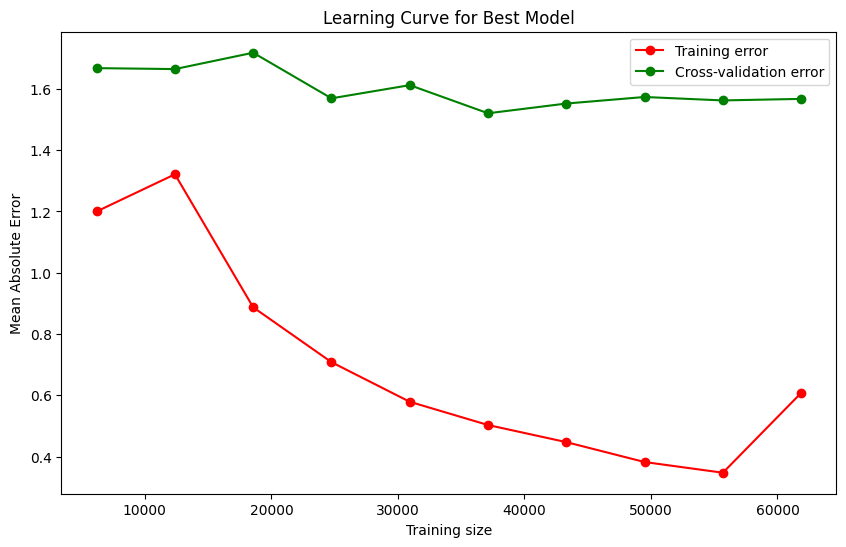

In [32]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
import time
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./model_input.csv')

# Convert reservation_time to datetime
data['reservation_time'] = pd.to_datetime(data['reservation_time'])

# Extract month, hour, and weekday from reservation_time
data['month'] = data['reservation_time'].dt.month
data['hour'] = data['reservation_time'].dt.hour
data['weekday'] = data['reservation_time'].dt.weekday

# One-hot encode categorical features
month_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
month_encoded = month_encoder.fit_transform(data[['month']])
month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=data.index)

hour_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
hour_encoded = hour_encoder.fit_transform(data[['hour']])
hour_encoded_df = pd.DataFrame(hour_encoded.toarray(), columns=hour_encoder.get_feature_names_out(['hour']), index=data.index)

high_chair_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
high_chair_encoded = high_chair_encoder.fit_transform(data[['high_chair_size']])
high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=data.index)

weekday_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
weekday_encoded = weekday_encoder.fit_transform(data[['weekday']])
weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=data.index)

# Combine all encoded features with the original data
data_encoded = pd.concat([data, month_encoded_df, hour_encoded_df, high_chair_encoded_df, weekday_encoded_df], axis=1)

# Drop rows with missing ETA values
data_encoded = data_encoded.dropna(subset=['ETA'])

# Define features including the hour and weekday features
features = ['party_size', 'queue_size'] + list(month_encoded_df.columns) + list(hour_encoded_df.columns) + list(high_chair_encoded_df.columns) + list(weekday_encoded_df.columns)
target = 'ETA'

# Function to handle negative and zero ETA values
def handle_negative_zero(df):
    df['ETA'] = df['ETA'].apply(lambda x: max(x, 0))  # Ensure no negative or zero ETA values
    return df

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'XGBoost Regression': XGBRegressor(random_state=42)
}

# Store results
results = {}
model_objects = {}

# Iterate over each model
for model_name, model in models.items():
    start_time = time.time()  # Start time for computation time

    # Create a copy of the data
    df_processed = data_encoded.copy()

    # Handle negative and zero ETA values
    df_processed = handle_negative_zero(df_processed)

    # Define features (X) and target (y)
    X = df_processed[features]
    y = df_processed[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    end_time = time.time()  # End time for computation time
    computation_time = end_time - start_time

    # Store results and model object
    results[model_name] = {
        'MAE': mae,
        'Computation Time': computation_time
    }
    model_objects[model_name] = model

# Determine the best model based on MAE and computation time
best_model_name = None
best_mae = float('inf')
best_computation_time = float('inf')

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MAE = {metrics['MAE']:.2f}, Computation Time = {metrics['Computation Time']:.4f} seconds")
    if metrics['MAE'] < best_mae or (metrics['MAE'] == best_mae and metrics['Computation Time'] < best_computation_time):
        best_model_name = model_name
        best_mae = metrics['MAE']
        best_computation_time = metrics['Computation Time']

best_model = model_objects[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best MAE: {best_mae:.2f}")
print(f"Computation Time: {best_computation_time:.4f} seconds")

# Learning curve analysis for the best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation error')
plt.xlabel('Training size')
plt.ylabel('Mean Absolute Error')
plt.title('Learning Curve for Best Model')
plt.legend(loc='best')
plt.show()


In [33]:
def prepare_input_data(input_data, month_encoder, hour_encoder, high_chair_encoder, weekday_encoder):
    input_df = pd.DataFrame([input_data])
    input_df['reservation_time'] = pd.to_datetime(input_df['reservation_time'])
    input_df['month'] = input_df['reservation_time'].dt.month
    input_df['hour'] = input_df['reservation_time'].dt.hour
    input_df['weekday'] = input_df['reservation_time'].dt.weekday

    month_encoded = month_encoder.transform(input_df[['month']])
    month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=input_df.index)

    hour_encoded = hour_encoder.transform(input_df[['hour']])
    hour_encoded_df = pd.DataFrame(hour_encoded.toarray(), columns=hour_encoder.get_feature_names_out(['hour']), index=input_df.index)

    high_chair_encoded = high_chair_encoder.transform(input_df[['high_chair_size']])
    high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=input_df.index)

    weekday_encoded = weekday_encoder.transform(input_df[['weekday']])
    weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=input_df.index)

    input_encoded = pd.concat([input_df, month_encoded_df, hour_encoded_df, high_chair_encoded_df, weekday_encoded_df], axis=1)
    return input_encoded[features]

# Example input for prediction
input_data = {
    'reservation_time': '2024-07-16 00:30:00',
    'party_size': 8,
    'high_chair_size': 0,
    'queue_size': 8
}

# Prepare the input data
input_encoded = prepare_input_data(input_data, month_encoder, hour_encoder, high_chair_encoder, weekday_encoder)

# Predict using the best model
prediction = best_model.predict(input_encoded)
print(f"Predicted ETA: {prediction[0]:.2f} minutes")

Predicted ETA: 19.68 minutes


## Predicted_eta binning

Model: Linear Regression
MAE = 0.97, Computation Time = 0.3021 seconds
Model: Ridge Regression
MAE = 0.97, Computation Time = 0.1707 seconds
Model: Lasso Regression
MAE = 0.98, Computation Time = 0.3693 seconds
Model: Decision Tree Regression
MAE = 0.95, Computation Time = 0.2931 seconds
Model: XGBoost Regression
MAE = 0.86, Computation Time = 0.5955 seconds

Best Model: XGBoost Regression
Best MAE: 0.86
Computation Time: 0.5955 seconds
Predictions and errors saved to ./predicted_eta.csv


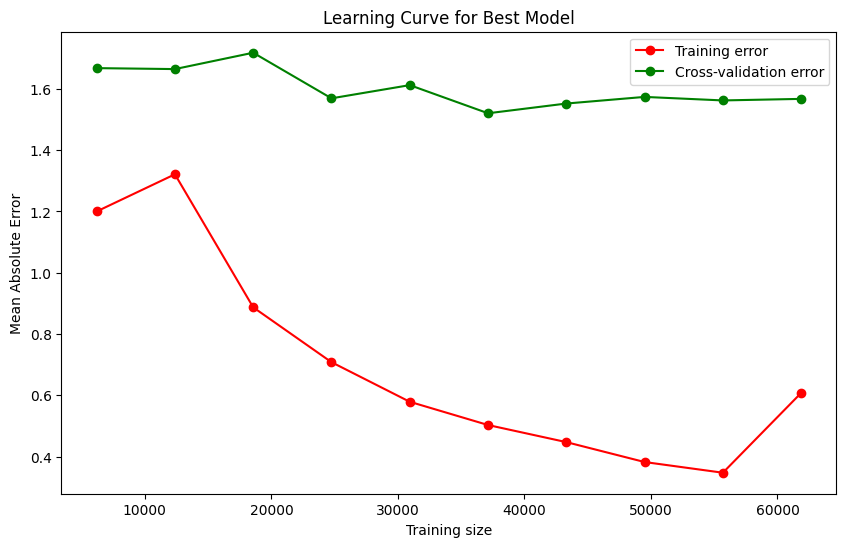

In [27]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor  # Import XGBoost
from sklearn.preprocessing import OneHotEncoder
import time

# Load the data
data = pd.read_csv('./model_input.csv')

# Convert reservation_time to datetime
data['reservation_time'] = pd.to_datetime(data['reservation_time'])

# Extract month, hour, and weekday from reservation_time
data['month'] = data['reservation_time'].dt.month
data['hour'] = data['reservation_time'].dt.hour
data['weekday'] = data['reservation_time'].dt.weekday

# One-hot encode the categorical features
month_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
month_encoded = month_encoder.fit_transform(data[['month']])
month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=data.index)

hour_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
hour_encoded = hour_encoder.fit_transform(data[['hour']])
hour_encoded_df = pd.DataFrame(hour_encoded.toarray(), columns=hour_encoder.get_feature_names_out(['hour']), index=data.index)

weekday_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
weekday_encoded = weekday_encoder.fit_transform(data[['weekday']])
weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=data.index)

high_chair_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
high_chair_encoded = high_chair_encoder.fit_transform(data[['high_chair_size']])
high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=data.index)

# Combine all encoded features with the original data
data_encoded = pd.concat([data, month_encoded_df, hour_encoded_df, weekday_encoded_df, high_chair_encoded_df], axis=1)

# Define features including the hour and weekday features
features = ['party_size', 'queue_size'] + list(month_encoded_df.columns) + list(hour_encoded_df.columns) + list(weekday_encoded_df.columns) + list(high_chair_encoded_df.columns)
target = 'ETA'

# Function to handle negative or zero ETA values
def handle_negative_zero(df):
    df['ETA'] = df['ETA'].apply(lambda x: max(x, 0))
    return df

# Remove rows with missing ETA values
data_encoded = data_encoded.dropna(subset=['ETA'])

# Dictionary of models to be tested
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'XGBoost Regression': XGBRegressor(random_state=42)  
}

# Training and evaluating models
results = {}
for model_name, model in models.items():
    start_time = time.time()
    df_processed = data_encoded.copy()
    df_processed = handle_negative_zero(df_processed)
    X = df_processed[features]
    y = df_processed[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    end_time = time.time()
    computation_time = end_time - start_time
    results[model_name] = {'MAE': mae, 'Computation Time': computation_time}

# Select the best model based on MAE
best_model = None
best_mae = float('inf')
best_computation_time = float('inf')
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"MAE = {metrics['MAE']:.2f}, Computation Time = {metrics['Computation Time']:.4f} seconds")
    if metrics['MAE'] < best_mae or (metrics['MAE'] == best_mae and metrics['Computation Time'] < best_computation_time):
        best_model = model
        best_mae = metrics['MAE']
        best_computation_time = metrics['Computation Time']
print(f"\nBest Model: {best_model}")
print(f"Best MAE: {best_mae:.2f}")
print(f"Computation Time: {best_computation_time:.4f} seconds")

# Predicting ETA for each row and calculating the error
best_model_instance = models[best_model]

# Ensure the feature DataFrame includes the non-one-hot encoded columns
data_encoded_features = pd.concat([data[['party_size', 'queue_size']], month_encoded_df, hour_encoded_df, weekday_encoded_df, high_chair_encoded_df], axis=1)

# Predict ETA
data['predicted_eta'] = best_model_instance.predict(data_encoded_features)
data['error'] = data['ETA'] - data['predicted_eta']

# Save the results to a new CSV file
output_path = './predicted_eta.csv'
data.to_csv(output_path, index=False)

print(f"Predictions and errors saved to {output_path}")

train_sizes, train_scores, test_scores = learning_curve(
    best_model_instance, X, y, cv=5, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation error')
plt.xlabel('Training size')
plt.ylabel('Mean Absolute Error')
plt.title('Learning Curve for Best Model')
plt.legend(loc='best')
plt.show()


## Training Error (red line): 
As the training size increases, the training error decreases. This is a typical behavior, indicating that the model is learning and fitting better to the training data with more data points.
## Cross-Validation Error (green line): 
The cross-validation error remains relatively constant, with slight fluctuations, as the training size increases. This suggests that the model's generalization performance on unseen data is not improving significantly with more training data, indicating a potential limitation in model capacity or data quality.

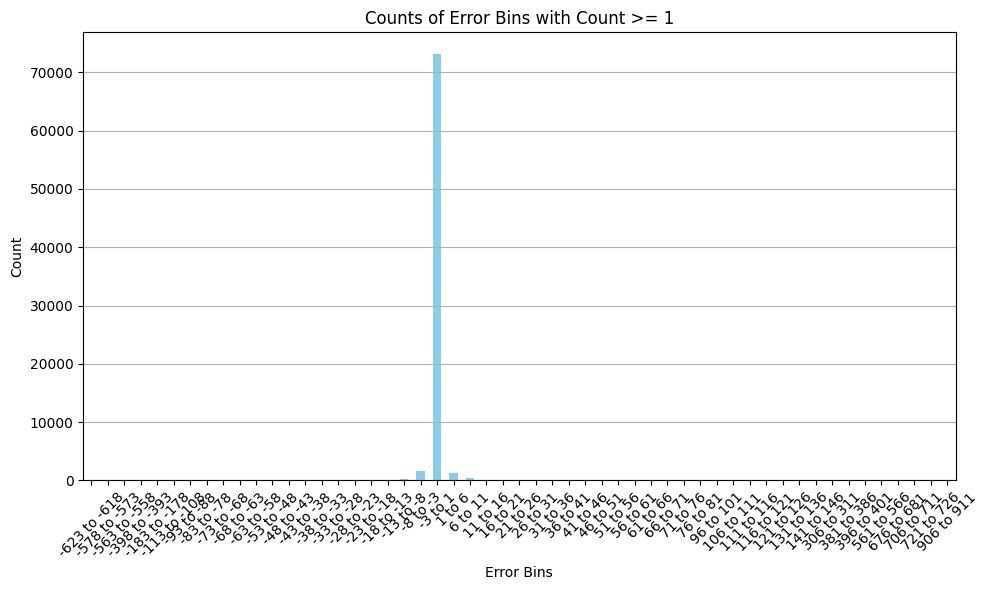

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = './predicted_eta.csv'
data = pd.read_csv(data_path)

min_error = data['error'].min()
max_error = data['error'].max()

bin_edges = np.arange(min_error, max_error + 5, 5)

custom_bin_labels = [f"{int(bin_edges[i])} to {int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]

data['error_bin'] = pd.cut(data['error'], bins=bin_edges, labels=custom_bin_labels, include_lowest=True, right=False)

bin_counts = data['error_bin'].value_counts().sort_index()

filtered_bins = bin_counts[bin_counts >= 1]

plt.figure(figsize=(10, 6))
filtered_bins.plot(kind='bar', color='skyblue')
plt.xlabel('Error Bins')
plt.ylabel('Count')
plt.title('Counts of Error Bins with Count >= 1')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

data.to_csv('./predicted_eta.csv')

In [90]:
highest_count_bin = filtered_bins.idxmax()
filtered_data = data[data['error_bin'] == highest_count_bin]
sorted_data = filtered_data.sort_values(by='error_bin')
weekday_counts = sorted_data['weekday'].value_counts().sort_index()

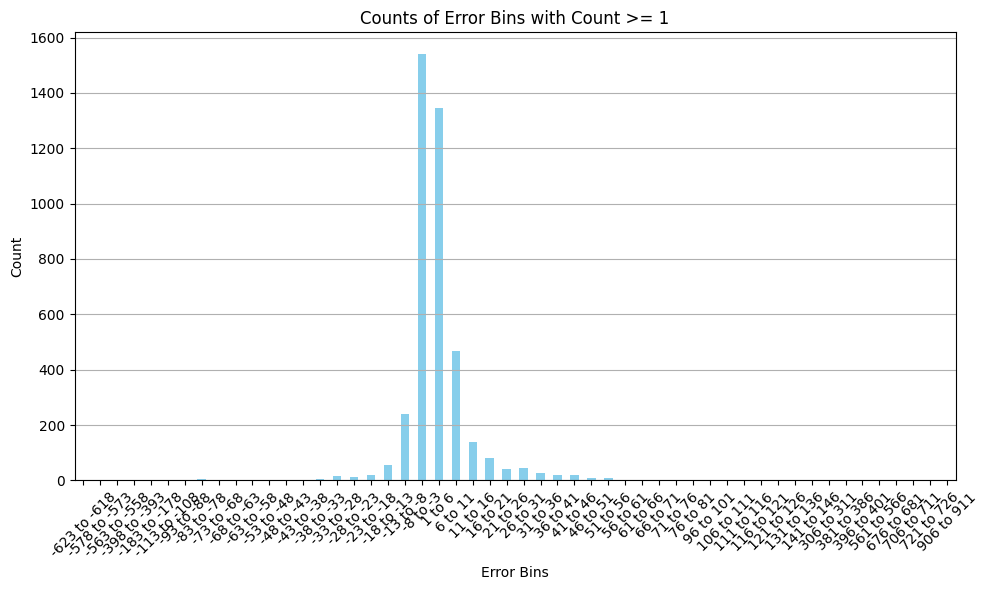

In [91]:
data_bin = ['-3 to 1']
filtered_df = data[~data['error_bin'].isin(data_bin)]
bin_counts = filtered_df['error_bin'].value_counts().sort_index()

filtered_bins = bin_counts[bin_counts >= 1]

plt.figure(figsize=(10, 6))
filtered_bins.plot(kind='bar', color='skyblue')
plt.xlabel('Error Bins')
plt.ylabel('Count')
plt.title('Counts of Error Bins with Count >= 1')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [92]:
filtered_df=filtered_df[['reservation_id','locaion_id','party_size','high_chair_size','reservation_time','hour','weekday','queue_size','month','season','ETA']]

In [93]:
filtered_df.to_csv('./test.csv')

In [94]:
data_bin = ['-3 to 1']
filtered_df_2 = data[data['error_bin'].isin(data_bin)]
bin_counts = filtered_df_2['error_bin'].value_counts().sort_index()

filtered_bins = bin_counts[bin_counts >= 1]

In [95]:
filtered_df_2=filtered_df_2[['reservation_id','locaion_id','party_size','high_chair_size','reservation_time','hour','weekday','queue_size','month','season','ETA']]

In [96]:
filtered_df_2.to_csv('./train.csv')

## Synthetic Data -1

In [42]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import time

# Load the training data
train_data = pd.read_csv('./train.csv')  # Update with the actual path to your train file

# Convert reservation_time to datetime
train_data['reservation_time'] = pd.to_datetime(train_data['reservation_time'])

# Extract month, hour, and weekday from reservation_time
train_data['month'] = train_data['reservation_time'].dt.month
train_data['hour'] = train_data['reservation_time'].dt.hour
train_data['weekday'] = train_data['reservation_time'].dt.weekday

# One-hot encode categorical features
def encode_features(data):
    month_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
    month_encoded = month_encoder.fit_transform(data[['month']])
    month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=data.index)

    high_chair_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
    high_chair_encoded = high_chair_encoder.fit_transform(data[['high_chair_size']])
    high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=data.index)

    weekday_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
    weekday_encoded = weekday_encoder.fit_transform(data[['weekday']])
    weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=data.index)

    season_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
    season_encoded = season_encoder.fit_transform(data[['season']])
    season_encoded_df = pd.DataFrame(season_encoded.toarray(), columns=season_encoder.get_feature_names_out(['season']), index=data.index)

    data_encoded = pd.concat([data, month_encoded_df, high_chair_encoded_df, weekday_encoded_df, season_encoded_df], axis=1)
    return data_encoded, month_encoder, high_chair_encoder, weekday_encoder, season_encoder

train_data_encoded, month_encoder, high_chair_encoder, weekday_encoder, season_encoder = encode_features(train_data)

# Define features including the hour and weekday features
features = ['party_size', 'queue_size', 'hour'] + list(month_encoder.get_feature_names_out(['month'])) + list(high_chair_encoder.get_feature_names_out(['high_chair_size'])) + list(weekday_encoder.get_feature_names_out(['weekday'])) + list(season_encoder.get_feature_names_out(['season']))
target = 'ETA'

# Function to handle negative and zero ETA values
def handle_negative_zero(df):
    df['ETA'] = df['ETA'].apply(lambda x: max(x, 0))
    return df

# Handle negative and zero ETA values
train_data_encoded = handle_negative_zero(train_data_encoded)

# Define features (X) and target (y)
X_train = train_data_encoded[features]
y_train = train_data_encoded[target]

# Define and train the best model (assuming XGBoost is the best model from your previous analysis)
best_model = XGBRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Load the test pattern data
test_data = pd.read_csv('./test.csv')  # Update with the actual path to your test file

# Function to prepare input data for prediction
def prepare_input_data(input_data, month_encoder, high_chair_encoder, weekday_encoder, season_encoder):
    input_df = pd.DataFrame(input_data)
    input_df['reservation_time'] = pd.to_datetime(input_df['reservation_time'])
    input_df['month'] = input_df['reservation_time'].dt.month
    input_df['hour'] = input_df['reservation_time'].dt.hour
    input_df['weekday'] = input_df['reservation_time'].dt.weekday

    month_encoded = month_encoder.transform(input_df[['month']])
    month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=input_df.index)

    high_chair_encoded = high_chair_encoder.transform(input_df[['high_chair_size']])
    high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=input_df.index)

    weekday_encoded = weekday_encoder.transform(input_df[['weekday']])
    weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=input_df.index)

    season_encoded = season_encoder.transform(input_df[['season']])
    season_encoded_df = pd.DataFrame(season_encoded.toarray(), columns=season_encoder.get_feature_names_out(['season']), index=input_df.index)

    input_encoded = pd.concat([input_df, month_encoded_df, high_chair_encoded_df, weekday_encoded_df, season_encoded_df], axis=1)
    return input_encoded[features]

# Prepare the test data
X_test = prepare_input_data(test_data, month_encoder, high_chair_encoder, weekday_encoder, season_encoder)

# Predict ETA for the test data
test_data['ETA'] = best_model.predict(X_test)

# Save the test data with the predicted ETA
test_data.to_csv('./test.csv', index=False)  # Update with the actual path to your output file

# Append the test data with the predicted ETA to the original train data
updated_train_data = pd.concat([train_data, test_data], ignore_index=True)

# Save the updated train data
updated_train_data.to_csv('./train.csv', index=False)  # Update with the actual path to your train file

print("ETA prediction for the test data complete and results appended to train.csv.")


ETA prediction for the test data complete and results appended to train.csv.


## TRAINING ON SYNTHETIC DATA -1

Model: Linear Regression
MAE = 0.48, Computation Time = 1.1026 seconds
Model: Ridge Regression
MAE = 0.48, Computation Time = 0.1687 seconds
Model: Lasso Regression
MAE = 0.39, Computation Time = 0.1729 seconds
Model: Decision Tree Regression
MAE = 0.13, Computation Time = 0.2157 seconds
Model: XGBoost Regression
MAE = 0.11, Computation Time = 0.3861 seconds

Best Model: XGBoost Regression
Best MAE: 0.11
Computation Time: 0.3861 seconds
Predictions and errors saved to ./predicted_eta_new.csv


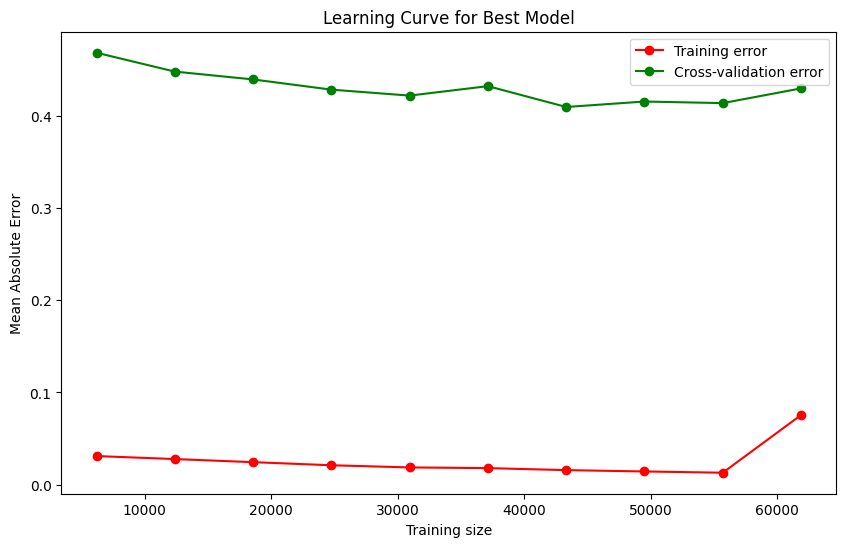

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor  # Import XGBoost
from sklearn.preprocessing import OneHotEncoder
import time

data = pd.read_csv('./train.csv')

data['reservation_time'] = pd.to_datetime(data['reservation_time'])

data['month'] = data['reservation_time'].dt.month
data['hour'] = data['reservation_time'].dt.hour
data['weekday'] = data['reservation_time'].dt.weekday

month_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
month_encoded = month_encoder.fit_transform(data[['month']])
month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=data.index)

hour_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
hour_encoded = hour_encoder.fit_transform(data[['hour']])
hour_encoded_df = pd.DataFrame(hour_encoded.toarray(), columns=hour_encoder.get_feature_names_out(['hour']), index=data.index)

weekday_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
weekday_encoded = weekday_encoder.fit_transform(data[['weekday']])
weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=data.index)

high_chair_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
high_chair_encoded = high_chair_encoder.fit_transform(data[['high_chair_size']])
high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=data.index)

data_encoded = pd.concat([data, month_encoded_df, hour_encoded_df, weekday_encoded_df, high_chair_encoded_df], axis=1)

features = ['party_size', 'queue_size'] + list(month_encoded_df.columns) + list(hour_encoded_df.columns) + list(weekday_encoded_df.columns) + list(high_chair_encoded_df.columns)
target = 'ETA'

def handle_negative_zero(df):
    df['ETA'] = df['ETA'].apply(lambda x: max(x, 0))
    return df

data_encoded = data_encoded.dropna(subset=['ETA'])

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'XGBoost Regression': XGBRegressor(random_state=42)  
}

results = {}
for model_name, model in models.items():
    start_time = time.time()
    df_processed = data_encoded.copy()
    df_processed = handle_negative_zero(df_processed)
    X = df_processed[features]
    y = df_processed[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    end_time = time.time()
    computation_time = end_time - start_time
    results[model_name] = {'MAE': mae, 'Computation Time': computation_time}

best_model = None
best_mae = float('inf')
best_computation_time = float('inf')
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"MAE = {metrics['MAE']:.2f}, Computation Time = {metrics['Computation Time']:.4f} seconds")
    if metrics['MAE'] < best_mae or (metrics['MAE'] == best_mae and metrics['Computation Time'] < best_computation_time):
        best_model = model
        best_mae = metrics['MAE']
        best_computation_time = metrics['Computation Time']
print(f"\nBest Model: {best_model}")
print(f"Best MAE: {best_mae:.2f}")
print(f"Computation Time: {best_computation_time:.4f} seconds")

best_model_instance = models[best_model]

data_encoded_features = pd.concat([data[['party_size', 'queue_size']], month_encoded_df, hour_encoded_df, weekday_encoded_df, high_chair_encoded_df], axis=1)

data['predicted_eta'] = best_model_instance.predict(data_encoded_features)
data['error'] = data['ETA'] - data['predicted_eta']

output_path = './predicted_eta_new.csv'
data.to_csv(output_path, index=False)

print(f"Predictions and errors saved to {output_path}")

# Plot the learning curve for the best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model_instance, X, y, cv=5, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation error')
plt.xlabel('Training size')
plt.ylabel('Mean Absolute Error')
plt.title('Learning Curve for Best Model')
plt.legend(loc='best')
plt.show()


## Training Error (Red Line):

The training error starts very low and remains low as the training size increases. This suggests that the model is able to fit the training data very well.
The consistently low training error indicates that the model is complex enough to capture patterns in the training data, potentially even the noise.
## Cross-Validation Error (Green Line):

The cross-validation error starts relatively high and decreases slightly as the training size increases, but it remains significantly higher than the training error.
The gap between the training error and the cross-validation error suggests that the model is overfitting. Overfitting occurs when the model performs well on the training data but poorly on unseen data (validation or test data).

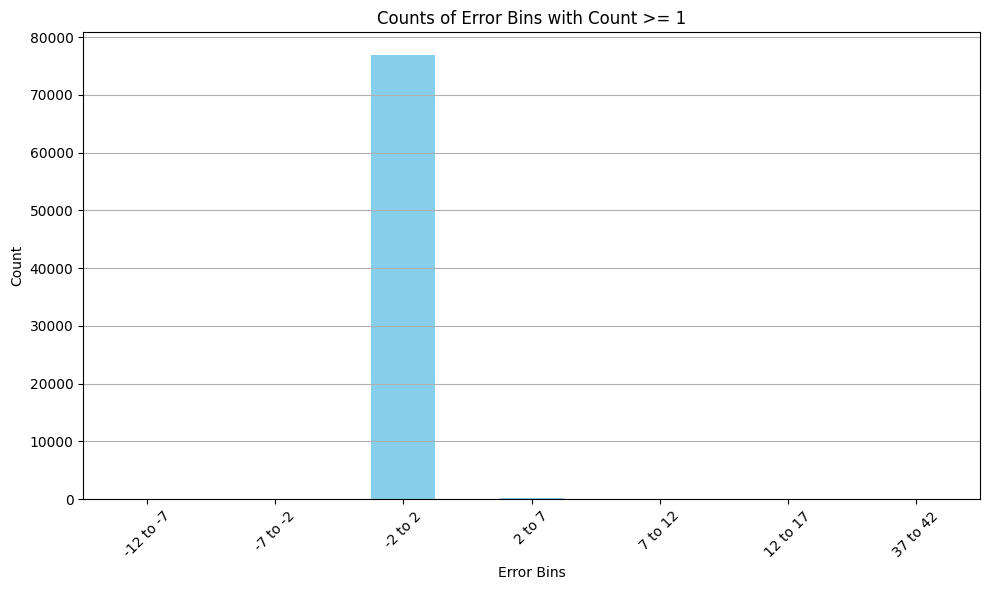

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your actual data
data_path = './predicted_eta_new.csv'  # Replace this with the actual path to your CSV file
data = pd.read_csv(data_path)

min_error = data['error'].min()
max_error = data['error'].max()

# Create bins with 5-unit intervals
bin_edges = np.arange(min_error, max_error + 5, 5)

custom_bin_labels = [f"{int(bin_edges[i])} to {int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]

data['error_bin'] = pd.cut(data['error'], bins=bin_edges, labels=custom_bin_labels, include_lowest=True, right=False)

bin_counts = data['error_bin'].value_counts().sort_index()

filtered_bins = bin_counts[bin_counts >= 1]

plt.figure(figsize=(10, 6))
filtered_bins.plot(kind='bar', color='skyblue')
plt.xlabel('Error Bins')
plt.ylabel('Count')
plt.title('Counts of Error Bins with Count >= 1')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

data.to_csv('./predicted_eta_new.csv')


In [45]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
import time

# Load the data
data = pd.read_csv('./train.csv')

# Convert reservation_time to datetime
data['reservation_time'] = pd.to_datetime(data['reservation_time'])

# Extract month, hour, and weekday from reservation_time
data['month'] = data['reservation_time'].dt.month
data['hour'] = data['reservation_time'].dt.hour
data['weekday'] = data['reservation_time'].dt.weekday

# One-hot encode categorical features
month_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
month_encoded = month_encoder.fit_transform(data[['month']])
month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=data.index)

high_chair_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
high_chair_encoded = high_chair_encoder.fit_transform(data[['high_chair_size']])
high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=data.index)

weekday_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
weekday_encoded = weekday_encoder.fit_transform(data[['weekday']])
weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=data.index)

# Combine all encoded features with the original data
data_encoded = pd.concat([data, month_encoded_df, high_chair_encoded_df, weekday_encoded_df], axis=1)

# Define features including the hour and weekday features
features = ['party_size', 'queue_size', 'hour'] + list(month_encoded_df.columns) + list(high_chair_encoded_df.columns) + list(weekday_encoded_df.columns)
target = 'ETA'

# Function to handle negative and zero ETA values
def handle_negative_zero(df):
    df['ETA'] = df['ETA'].apply(lambda x: max(x, 0))
    return df

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'XGBoost Regression': XGBRegressor(random_state=42)
}

# Store results
results = {}
model_objects = {}

# Iterate over each model
for model_name, model in models.items():
    start_time = time.time()  # Start time for computation time

    # Create a copy of the data
    df_processed = data_encoded.copy()

    # Handle negative and zero ETA values
    df_processed = handle_negative_zero(df_processed)

    # Define features (X) and target (y)
    X = df_processed[features]
    y = df_processed[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    end_time = time.time()  # End time for computation time
    computation_time = end_time - start_time

    # Store results and model object
    results[model_name] = {
        'MAE': mae,
        'Computation Time': computation_time
    }
    model_objects[model_name] = model

# Determine the best model based on MAE and computation time
best_model_name = None
best_mae = float('inf')
best_computation_time = float('inf')

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MAE = {metrics['MAE']:.2f}, Computation Time = {metrics['Computation Time']:.4f} seconds")
    if metrics['MAE'] < best_mae or (metrics['MAE'] == best_mae and metrics['Computation Time'] < best_computation_time):
        best_model_name = model_name
        best_mae = metrics['MAE']
        best_computation_time = metrics['Computation Time']

best_model = model_objects[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best MAE: {best_mae:.2f}")
print(f"Computation Time: {best_computation_time:.4f} seconds")

# Function to prepare input data for prediction
def prepare_input_data(input_data, month_encoder, high_chair_encoder, weekday_encoder):
    input_df = pd.DataFrame([input_data])
    input_df['reservation_time'] = pd.to_datetime(input_df['reservation_time'])
    input_df['month'] = input_df['reservation_time'].dt.month
    input_df['hour'] = input_df['reservation_time'].dt.hour
    input_df['weekday'] = input_df['reservation_time'].dt.weekday

    month_encoded = month_encoder.transform(input_df[['month']])
    month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=input_df.index)

    high_chair_encoded = high_chair_encoder.transform(input_df[['high_chair_size']])
    high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=input_df.index)

    weekday_encoded = weekday_encoder.transform(input_df[['weekday']])
    weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=input_df.index)

    input_encoded = pd.concat([input_df, month_encoded_df, high_chair_encoded_df, weekday_encoded_df], axis=1)
    return input_encoded[features]


Model: Linear Regression
MAE = 0.48, Computation Time = 0.2751 seconds
Model: Ridge Regression
MAE = 0.48, Computation Time = 0.1275 seconds
Model: Lasso Regression
MAE = 0.39, Computation Time = 0.2211 seconds
Model: Decision Tree Regression
MAE = 0.12, Computation Time = 0.1421 seconds
Model: XGBoost Regression
MAE = 0.10, Computation Time = 0.4077 seconds

Best Model: XGBoost Regression
Best MAE: 0.10
Computation Time: 0.4077 seconds


In [46]:
# Example input for prediction
input_data = {
    'reservation_time': '2024-07-16 00:30:00',
    'party_size': 7,
    'high_chair_size': 2,
    'queue_size': 10
}

# Prepare the input data
input_encoded = prepare_input_data(input_data, month_encoder, high_chair_encoder, weekday_encoder)

# Predict using the best model
prediction = best_model.predict(input_encoded)
print(f"Predicted ETA: {prediction[0]:.2f} minutes")


Predicted ETA: 24.01 minutes


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## SPL DAY ADDED

In [47]:
import pandas as pd

# Function to load special days from CSV
def load_special_days(filename):
    special_days_df = pd.read_csv(filename)
    special_days_df['Date'] = pd.to_datetime(special_days_df['Date'], format='%m-%d').dt.strftime('%m-%d')
    return special_days_df.set_index('Date')['Holiday'].to_dict()

# Read the reservation data
reservations = pd.read_csv('./train.csv')  # Update with your actual file path

# Load special days from CSV
special_days = load_special_days('./holidays_2021.csv')  # Update with your actual file path

# Function to check if a date is a special day
def check_special_day(date):
    month_day = date.strftime('%m-%d')
    if month_day in special_days:
        return "Yes", special_days[month_day]
    return "No", ""

# Convert reservation_time to datetime and extract month-day
reservations['reservation_time'] = pd.to_datetime(reservations['reservation_time'])
reservations['month_day'] = reservations['reservation_time'].dt.strftime('%m-%d')

# Check for special days and add flags
reservations['is_special_day'], reservations['special_day_name'] = zip(*reservations['reservation_time'].apply(check_special_day))

# Drop the helper column
reservations.drop(columns=['month_day'], inplace=True)

# Save the updated dataframe to a new CSV file
reservations.to_csv('./final_model_days.csv', index=False)

print("CSV file created successfully with special day flags.")


CSV file created successfully with special day flags.


In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
import time

# Load the data
data = pd.read_csv('./final_model_days.csv')

# Convert reservation_time to datetime
data['reservation_time'] = pd.to_datetime(data['reservation_time'])

# Extract month, hour, and weekday from reservation_time
data['month'] = data['reservation_time'].dt.month
data['hour'] = data['reservation_time'].dt.hour
data['weekday'] = data['reservation_time'].dt.weekday

# Assume 'is_special_day' column exists in your dataset
# Encode is_special_day feature using OneHotEncoder
is_special_day_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
is_special_day_encoded = is_special_day_encoder.fit_transform(data[['is_special_day']])
is_special_day_encoded_df = pd.DataFrame(is_special_day_encoded.toarray(), columns=is_special_day_encoder.get_feature_names_out(['is_special_day']), index=data.index)

# One-hot encode categorical features
month_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
month_encoded = month_encoder.fit_transform(data[['month']])
month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=data.index)

high_chair_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
high_chair_encoded = high_chair_encoder.fit_transform(data[['high_chair_size']])
high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=data.index)

weekday_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
weekday_encoded = weekday_encoder.fit_transform(data[['weekday']])
weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=data.index)

# Combine all encoded features with the original data
data_encoded = pd.concat([data, month_encoded_df, high_chair_encoded_df, weekday_encoded_df, is_special_day_encoded_df], axis=1)

# Define features including the hour and weekday features
features = ['party_size', 'queue_size', 'hour'] + list(month_encoded_df.columns) + list(high_chair_encoded_df.columns) + list(weekday_encoded_df.columns) + list(is_special_day_encoded_df.columns)
target = 'ETA'

# Function to handle negative and zero ETA values
def handle_negative_zero(df):
    df['ETA'] = df['ETA'].apply(lambda x: max(x, 0))
    return df

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'XGBoost Regression': XGBRegressor(random_state=42)
}

# Store results
results = {}
model_objects = {}

# Iterate over each model
for model_name, model in models.items():
    start_time = time.time()  # Start time for computation time

    # Create a copy of the data
    df_processed = data_encoded.copy()

    # Handle negative and zero ETA values
    df_processed = handle_negative_zero(df_processed)

    # Define features (X) and target (y)
    X = df_processed[features]
    y = df_processed[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    end_time = time.time()  # End time for computation time
    computation_time = end_time - start_time

    # Store results and model object
    results[model_name] = {
        'MAE': mae,
        'Computation Time': computation_time
    }
    model_objects[model_name] = model

# Determine the best model based on MAE and computation time
best_model_name = None
best_mae = float('inf')
best_computation_time = float('inf')

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MAE = {metrics['MAE']:.2f}, Computation Time = {metrics['Computation Time']:.4f} seconds")
    if metrics['MAE'] < best_mae or (metrics['MAE'] == best_mae and metrics['Computation Time'] < best_computation_time):
        best_model_name = model_name
        best_mae = metrics['MAE']
        best_computation_time = metrics['Computation Time']

best_model = model_objects[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best MAE: {best_mae:.2f}")
print(f"Computation Time: {best_computation_time:.4f} seconds")



Model: Linear Regression
MAE = 0.48, Computation Time = 0.3731 seconds
Model: Ridge Regression
MAE = 0.48, Computation Time = 0.1995 seconds
Model: Lasso Regression
MAE = 0.39, Computation Time = 0.3614 seconds
Model: Decision Tree Regression
MAE = 0.12, Computation Time = 0.3051 seconds
Model: XGBoost Regression
MAE = 0.10, Computation Time = 0.4580 seconds

Best Model: XGBoost Regression
Best MAE: 0.10
Computation Time: 0.4580 seconds


## Analysis on hour_bin to error_bin

In [49]:
import pandas as pd

# Sample data
data = pd.read_csv('./predicted_eta_new.csv')

# Create DataFrame
df = pd.DataFrame(data)

# Convert reservation_time to datetime
df['reservation_time'] = pd.to_datetime(df['reservation_time'])

# Extract the hour from reservation_time
df['hour'] = df['reservation_time'].dt.hour

# Create bins for hours
bins = [f"{hour}-{hour+1}" for hour in range(24)]
df['hour_bin'] = pd.cut(df['hour'], bins=range(25), right=False, labels=bins)

print(df[['reservation_time', 'hour_bin']])


               reservation_time hour_bin
0     2020-10-24 21:54:09+00:00    21-22
1     2020-10-24 22:09:25+00:00    22-23
2     2020-10-24 22:19:55+00:00    22-23
3     2020-10-24 22:30:53+00:00    22-23
4     2020-10-24 22:35:09+00:00    22-23
...                         ...      ...
77340 2024-06-30 01:44:23+00:00      1-2
77341 2024-06-30 01:47:41+00:00      1-2
77342 2024-07-03 01:33:07+00:00      1-2
77343 2024-07-04 01:38:22+00:00      1-2
77344 2024-07-04 01:45:45+00:00      1-2

[77345 rows x 2 columns]


In [50]:
df.to_csv('./predicted_eta_new.csv')

In [51]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'reservation_id', 'locaion_id',
       'party_size', 'high_chair_size', 'reservation_time', 'hour', 'weekday',
       'queue_size', 'month', 'season', 'ETA', 'predicted_eta', 'error',
       'error_bin', 'hour_bin'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8568\2014116827.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_count = df.groupby(['hour_bin', 'error_bin']).size().unstack(fill_value=0)


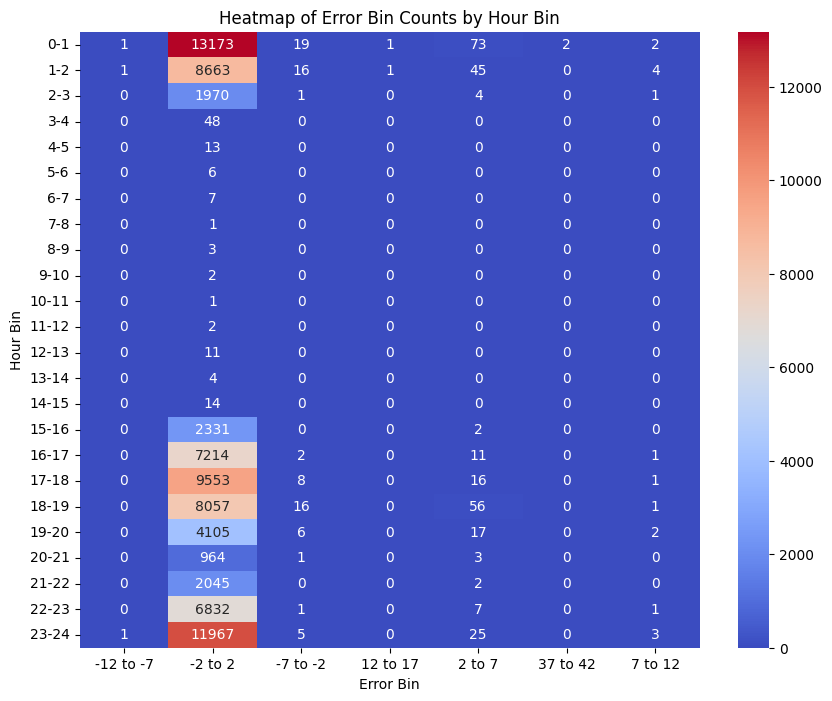

In [53]:
# Convert reservation_time to datetime
df['reservation_time'] = pd.to_datetime(df['reservation_time'])

# Create bins for hours
bins = [f"{hour}-{hour+1}" for hour in range(24)]
df['hour_bin'] = pd.cut(df['hour'], bins=range(25), right=False, labels=bins)

# Count the number of error_bin values falling under each hour_bin
error_count = df.groupby(['hour_bin', 'error_bin']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(error_count, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Error Bin Counts by Hour Bin')
plt.xlabel('Error Bin')
plt.ylabel('Hour Bin')
plt.show()

In [54]:
import pandas as pd

# Sample data
data = pd.read_csv('./predicted_eta.csv')

# Create DataFrame
df = pd.DataFrame(data)

# Convert reservation_time to datetime
df['reservation_time'] = pd.to_datetime(df['reservation_time'])

# Extract the hour from reservation_time
df['hour'] = df['reservation_time'].dt.hour

# Create bins for hours
bins = [f"{hour}-{hour+1}" for hour in range(24)]
df['hour_bin'] = pd.cut(df['hour'], bins=range(25), right=False, labels=bins)

print(df[['reservation_time', 'hour_bin']])


               reservation_time hour_bin
0     2020-10-24 21:41:53+00:00    21-22
1     2020-10-24 21:42:32+00:00    21-22
2     2020-10-24 21:53:45+00:00    21-22
3     2020-10-24 21:54:09+00:00    21-22
4     2020-10-24 21:58:08+00:00    21-22
...                         ...      ...
77340 2024-06-30 01:44:23+00:00      1-2
77341 2024-06-30 01:47:41+00:00      1-2
77342 2024-07-03 01:33:07+00:00      1-2
77343 2024-07-04 01:38:22+00:00      1-2
77344 2024-07-04 01:45:45+00:00      1-2

[77345 rows x 2 columns]


In [55]:
df.to_csv('./predicted_eta.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8568\424078986.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_count = df.groupby(['hour_bin', 'error_bin']).size().unstack(fill_value=0)


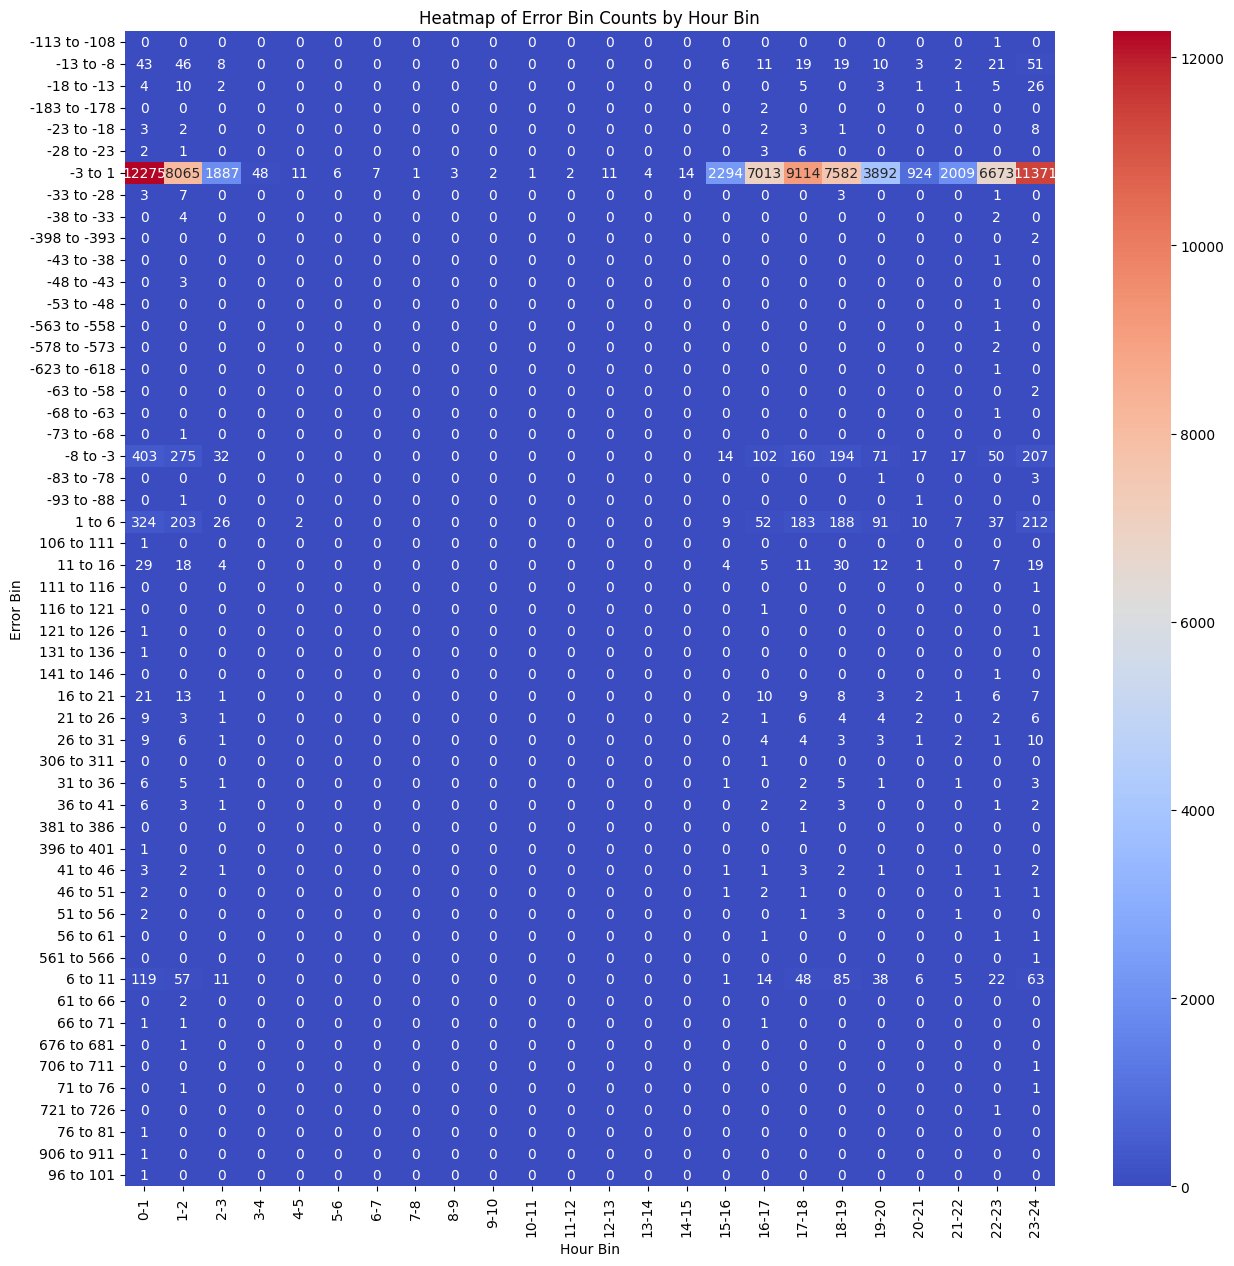

In [60]:
# Convert reservation_time to datetime
df['reservation_time'] = pd.to_datetime(df['reservation_time'])

# Create bins for hours
bins = [f"{hour}-{hour+1}" for hour in range(24)]
df['hour_bin'] = pd.cut(df['hour'], bins=range(25), right=False, labels=bins)

# Count the number of error_bin values falling under each hour_bin
error_count = df.groupby(['hour_bin', 'error_bin']).size().unstack(fill_value=0)

# Plot heatmap with x as hour_bin and y as error_bin
plt.figure(figsize=(15, 15))
sns.heatmap(error_count.T, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Error Bin Counts by Hour Bin')
plt.xlabel('Hour Bin')
plt.ylabel('Error Bin')
plt.show()